# Check 'weight' Aesthetic

In [1]:
import pandas as pd

from lets_plot import *


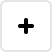
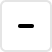
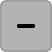
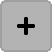
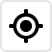
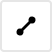
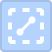
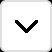
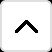
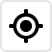
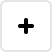
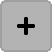
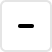
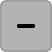
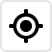
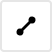
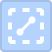
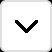
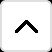
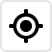

In [2]:
LetsPlot.setup_html()

In [3]:
def cut_na(data):
    return pd.DataFrame(data).dropna()

def replace_na_by_0(data):
    return pd.DataFrame(data).fillna(0)

In [4]:
def get_plot(layer, data, title_text=None):
    title = lambda subtitle_text: ggtitle(subtitle_text) if title_text is None else ggtitle(title_text, subtitle_text)
    return gggrid([
        ggplot(cut_na(data)) + layer + title("Filtered data (excluded NA)"),
        ggplot(replace_na_by_0(data)) + layer + title("0 instead of NA"),
        ggplot(data) + layer + ggtitle("Data as is (with NA)"),
    ])

## `geom_bar()`

In [5]:
def get_bar_data1():
    return {
        'v': ["A", "B", "C"],
        'w': [1, 2, None],
    }

def get_bar_data2():
    return {
        'v': ["A", "B", "C"],
        'w': [1, None, 2],
    }

In [6]:
get_plot(geom_bar(aes(x='v', weight='w')), get_bar_data1(), "geom_bar(): NA on border")

In [7]:
get_plot(geom_bar(aes(x='v', weight='w')), get_bar_data2(), "geom_bar(): NA within the range")

## `geom_histogram()`

In [8]:
def get_hist_data1():
    return {
        'v': [1, 2, 3],
        'w': [1, 2, None],
    }

def get_hist_data2():
    return {
        'v': [1, 2, 3],
        'w': [1, None, 2],
    }

In [9]:
get_plot(geom_histogram(aes(x='v', weight='w')), get_hist_data1(), "geom_histogram(): NA on border")

In [10]:
get_plot(geom_histogram(aes(x='v', weight='w')), get_hist_data2(), "geom_histogram(): NA within the range")

## `geom_density()`

In [11]:
def get_dens_data1():
    return {
        'v': [1, 2, 3],
        'w': [1, 2, None],
    }

def get_dens_data2():
    return {
        'v': [1, 2, 3],
        'w': [1, None, 2],
    }

In [12]:
get_plot(geom_density(aes(x='v', weight='w')), get_dens_data1(), "geom_density(): NA on border")

In [13]:
get_plot(geom_density(aes(x='v', weight='w')), get_dens_data2(), "geom_density(): NA within the range")

## `geom_violin()`

In [14]:
get_plot(geom_violin(aes(y='v', weight='w')), get_dens_data1(), "geom_violin(): NA on border")

In [15]:
get_plot(geom_violin(aes(y='v', weight='w')), get_dens_data2(), "geom_violin(): NA within the range")

## `geom_pie()`

In [16]:
get_plot(geom_pie(aes(slice='v', weight='w')), get_bar_data1())

## `geom_bin2d()`

In [17]:
def get_bin2d_data():
    return {
        'x': [0] * 3 + [1] * 3 + [2] * 3,
        'y': [0, 1, 2] * 3,
        'w': [2, 1, 1, 1, None, 1, 1, 1, 3],
    }

In [18]:
get_plot(geom_bin2d(aes('x', 'y', weight='w')), get_bin2d_data())

## `geom_hex()`

In [19]:
get_plot(geom_hex(aes('x', 'y', weight='w')), get_bin2d_data())

## `geom_density2d()`

In [20]:
def get_dens2d_data():
    return {
        'x': [0] * 3 + [1] * 3 + [2] * 3,
        'y': [0, 1, 2] * 3,
        'w': [2, 1, 1, 1, None, 1, 1, 1, 3],
    }

In [21]:
get_plot(geom_density2d(aes('x', 'y', weight='w')), get_dens2d_data())

## `geom_density2df()`

In [22]:
get_plot(geom_density2df(aes('x', 'y', weight='w', fill="..level..")), get_dens2d_data())